#### Importing Data

In [3]:
import sqlite3
import pandas as pd

In [4]:
# connecting to sqlite database
conn = sqlite3.connect("lahman2016.sqlite")

In [5]:
# filtering data to only include teams that are currently active and played 150 or more games
query = '''
SELECT * FROM Teams
INNER JOIN TeamsFranchises
ON Teams.franchID == TeamsFranchises.franchID
WHERE Teams.G >= 150 AND TeamsFranchises.active == 'Y';
'''

In [6]:
# getting the filtered result from database
Teams = conn.execute(query).fetchall()

In [7]:
# converting the teams to a dataframe using pandas
teams_df = pd.DataFrame(Teams)
teams_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,...,603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,...,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,...,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,...,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,...,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


#### Data Preparation and Cleaning

In [8]:
# adding column names
cols = ['yearID','lgID','teamID','franchID','divID',
        'Rank','G','Ghome','W','L','DivWin','WCWin',
        'LgWin','WSWin','R','AB','H','2B','3B','HR',
        'BB','SO','SB','CS','HBP','SF','RA','ER','ERA',
        'CG','SHO','SV','IPouts','HA','HRA','BBA','SOA',
        'E','DP','FP','name','park','attendance','BPF',
        'PPF','teamIDBR','teamIDlahman45','teamIDretro',
        'franchID','franchName','active','NAassoc']
teams_df.columns = cols

In [9]:
# set option used to display all columns
pd.set_option('display.max_columns', None)
teams_df.head(5)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,franchID,franchName,active,NAassoc
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,None,None,N,N,744,5424,1331,218,22,189,681,1068.0,37,28.0,NaN,NaN,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,Los Angeles Angels,Wrigley Field (LA),603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,None,None,N,N,718,5499,1377,232,35,137,602,917.0,46,27.0,NaN,NaN,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,Los Angeles Angels,Dodger Stadium,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,None,None,N,N,597,5506,1378,208,38,95,448,916.0,43,30.0,NaN,NaN,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,Los Angeles Angels,Dodger Stadium,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,None,None,N,N,544,5362,1297,186,27,102,472,920.0,49,39.0,NaN,NaN,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,Los Angeles Angels,Dodger Stadium,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,None,None,N,N,527,5354,1279,200,36,92,443,973.0,107,59.0,NaN,NaN,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,California Angels,Dodger Stadium,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


In [10]:
# dropping columns that won't be used
drop_cols = ['lgID','franchID','divID','Rank','Ghome',
             'L','DivWin','WCWin','LgWin','WSWin','SF',
             'name','park','attendance','BPF','PPF',
             'teamIDBR','teamIDlahman45','teamIDretro',
             'franchID','franchName','active','NAassoc']
# axis=1 refers to columns, axis=0 refers to rows
df = teams_df.drop(drop_cols,axis=1)

In [11]:
df.head(5)

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,1961,LAA,162,70,744,5424,1331,218,22,189,681,1068.0,37,28.0,NaN,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969
1,1962,LAA,162,86,718,5499,1377,232,35,137,602,917.0,46,27.0,NaN,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972
2,1963,LAA,161,70,597,5506,1378,208,38,95,448,916.0,43,30.0,NaN,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974
3,1964,LAA,162,82,544,5362,1297,186,27,102,472,920.0,49,39.0,NaN,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978
4,1965,CAL,162,75,527,5354,1279,200,36,92,443,973.0,107,59.0,NaN,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981


In [12]:
# checking null values for each column
print(df.isnull().sum(axis=0).tolist()) # counts the number of missing values in each column
# 110 null values for SO (strikeout), 22 for DP (double play), 419 for CS (caught stealing), 1777 for HBP (hit by pitch)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 419, 1777, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0]


In [13]:
# dropping CS and HBP columns
df = df.drop(['CS', 'HBP'], axis=1)

In [14]:
# using the median of the columns to fill out the null values
df['SO'] = df['SO'].fillna(df['SO'].median())
df['DP'] = df['DP'].fillna(df['DP'].median())

In [15]:
# checkinga again for null values
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [16]:
df.head(5)

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,1961,LAA,162,70,744,5424,1331,218,22,189,681,1068.0,37,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969
1,1962,LAA,162,86,718,5499,1377,232,35,137,602,917.0,46,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972
2,1963,LAA,161,70,597,5506,1378,208,38,95,448,916.0,43,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974
3,1964,LAA,162,82,544,5362,1297,186,27,102,472,920.0,49,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978
4,1965,CAL,162,75,527,5354,1279,200,36,92,443,973.0,107,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981


#### Data Visualization

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Histogram for # of Wins')

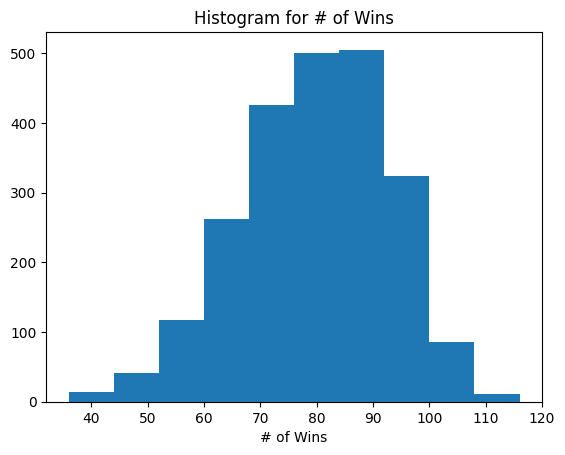

In [18]:
# visualizing wins as a histogram
plt.hist(df['W'])
plt.xlabel ('# of Wins')
plt.title ('Histogram for # of Wins')
# y-axis is the frequency (count) of data points that fall within that range

In [19]:
# checking the average number of wins
df['W'].mean()

np.float64(79.23043288150416)

In [20]:
def assign_win_bins(w):
    if w < 50:
        return 1
    elif w >= 50 and w < 70:
        return 2
    elif w >= 70 and w < 90:
        return 3
    elif w >= 90 and w < 110:
        return 4
    else:
        return 5

In [21]:
# applying function to 'W' column
df['win_bins'] = df['W'].apply(assign_win_bins)

Text(0, 0.5, 'wins')

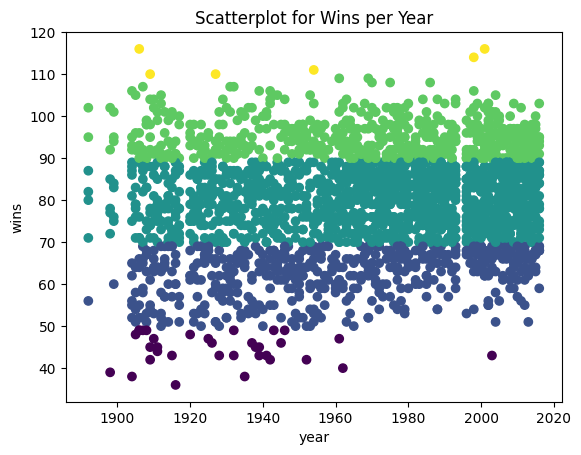

In [22]:
# creating scatter plot using win bins
plt.scatter(df['yearID'], df['W'], c=df['win_bins'])
plt.title('Scatterplot for Wins per Year')
plt.xlabel('year')
plt.ylabel('wins')

In [23]:
# dropping data before 1900 as they seem incomplete
df = df[df['yearID'] > 1900]

In [24]:
# creating dictionaries for runs per year and games per year
runs_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']

    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games

In [25]:
print(runs_per_year)

{1961: 12942, 1962: 14461, 1963: 12780, 1964: 13124, 1965: 12946, 1966: 12900, 1967: 12210, 1968: 11109, 1969: 15850, 1970: 16880, 1971: 15073, 1972: 13706, 1973: 16376, 1974: 16046, 1975: 16295, 1976: 15492, 1977: 18803, 1978: 17251, 1979: 18713, 1980: 18053, 1982: 18110, 1983: 18170, 1984: 17921, 1985: 18216, 1986: 18545, 1987: 19883, 1988: 17380, 1989: 17405, 1990: 17919, 1991: 18127, 1992: 17341, 1993: 20864, 1996: 22831, 1997: 21604, 1998: 23297, 1999: 24691, 2000: 24971, 2001: 23199, 2002: 22408, 2003: 22978, 2004: 23376, 2005: 22325, 2006: 23599, 2007: 23322, 2008: 22585, 2009: 22419, 2010: 21308, 2011: 20808, 2012: 21017, 2013: 20255, 2014: 19761, 2015: 20647, 2016: 21744, 1904: 9307, 1905: 9640, 1906: 8322, 1907: 8186, 1908: 8423, 1909: 8805, 1910: 9580, 1911: 11164, 1912: 11154, 1913: 9964, 1914: 9408, 1915: 9444, 1916: 8889, 1917: 8948, 1920: 10762, 1921: 11935, 1922: 12059, 1923: 11874, 1924: 11722, 1925: 12596, 1926: 11443, 1927: 11745, 1928: 11645, 1929: 12747, 1930: 1369

In [26]:
print(games_per_year)

{1961: 2860, 1962: 3242, 1963: 3238, 1964: 3252, 1965: 3246, 1966: 3230, 1967: 3240, 1968: 3250, 1969: 3892, 1970: 3888, 1971: 3876, 1972: 3718, 1973: 3886, 1974: 3890, 1975: 3868, 1976: 3878, 1977: 4206, 1978: 4204, 1979: 4198, 1980: 4210, 1982: 4214, 1983: 4218, 1984: 4210, 1985: 4206, 1986: 4206, 1987: 4210, 1988: 4200, 1989: 4212, 1990: 4210, 1991: 4208, 1992: 4212, 1993: 4538, 1996: 4534, 1997: 4532, 1998: 4864, 1999: 4856, 2000: 4858, 2001: 4858, 2002: 4852, 2003: 4860, 2004: 4856, 2005: 4862, 2006: 4858, 2007: 4862, 2008: 4856, 2009: 4860, 2010: 4860, 2011: 4858, 2012: 4860, 2013: 4862, 2014: 4860, 2015: 4858, 2016: 4856, 1904: 2498, 1905: 2474, 1906: 2307, 1907: 2317, 1908: 2488, 1909: 2482, 1910: 2498, 1911: 2474, 1912: 2464, 1913: 2468, 1914: 2512, 1915: 2490, 1916: 2494, 1917: 2494, 1920: 2468, 1921: 2458, 1922: 2476, 1923: 2466, 1924: 2462, 1925: 2456, 1926: 2468, 1927: 2472, 1928: 2462, 1929: 2458, 1930: 2468, 1931: 2472, 1932: 2466, 1933: 2303, 1934: 2297, 1935: 2158, 193

In [28]:
# create mlb_runs_per_game dictionary with years as keys and number of runs per game as value
mlb_runs_per_game = {}

for year, games in games_per_year.items():
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs/games

In [29]:
print(mlb_runs_per_game)

{1961: 4.525174825174825, 1962: 4.460518198642813, 1963: 3.9468807906114884, 1964: 4.035670356703567, 1965: 3.9882932840418976, 1966: 3.9938080495356036, 1967: 3.7685185185185186, 1968: 3.4181538461538463, 1969: 4.07245632065776, 1970: 4.341563786008231, 1971: 3.8888028895768834, 1972: 3.6863905325443787, 1973: 4.214101904271745, 1974: 4.124935732647815, 1975: 4.21277145811789, 1976: 3.99484270242393, 1977: 4.470518307180218, 1978: 4.103472882968601, 1979: 4.457598856598381, 1980: 4.2881235154394295, 1982: 4.297579496915045, 1983: 4.307728781412992, 1984: 4.256769596199525, 1985: 4.330955777460771, 1986: 4.409177365668093, 1987: 4.722802850356294, 1988: 4.1380952380952385, 1989: 4.132241215574549, 1990: 4.256294536817102, 1991: 4.307747148288973, 1992: 4.1170465337132, 1993: 4.597620096959012, 1996: 5.0355094838994265, 1997: 4.766990291262136, 1998: 4.789679276315789, 1999: 5.0846375617792425, 2000: 5.140181144503911, 2001: 4.7754219843557015, 2002: 4.6183017312448476, 2003: 4.72798353

In [30]:
# visualizing yearly MLB runs per game
# create lists from mlb_runs_per_game dictionary
lists = sorted(mlb_runs_per_game.items())
x, y = zip(*lists) # x is the list of keys, y is the list of values

Text(0, 0.5, 'mlb runs per game')

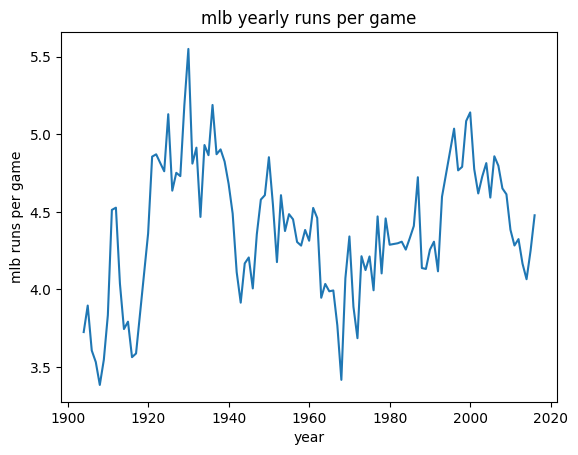

In [32]:
# creating line plot of mlb_runs_per_game vs year
plt.plot(x, y)
plt.title('mlb yearly runs per game')
plt.xlabel('year')
plt.ylabel('mlb runs per game')